In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [89]:
stats_df = pd.read_csv(r'/Users/gonzaloferreiro/Downloads/Blog_stats - Sheet2.csv')

In [94]:
stats_df['Pub date'] = pd.to_datetime(stats_df['Pub date'])

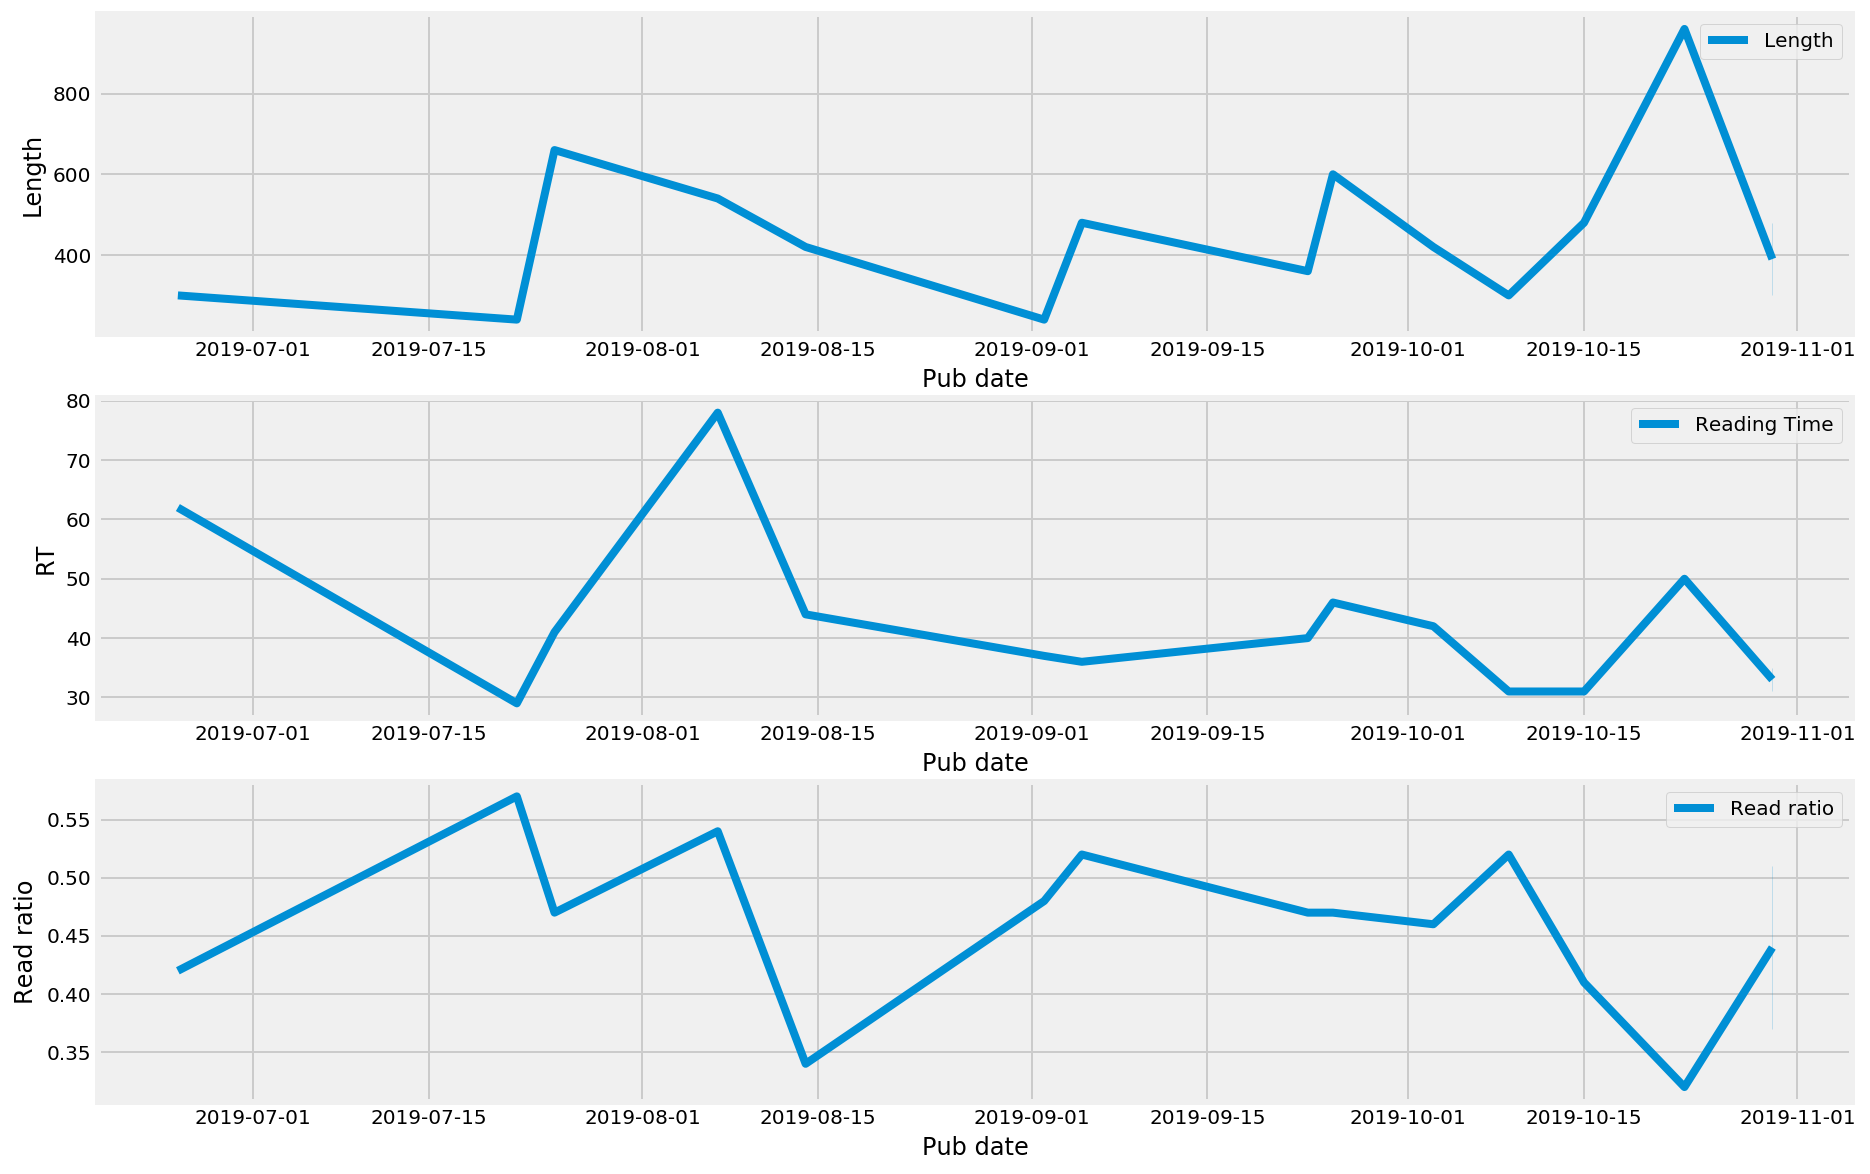

In [106]:
fig, ax = plt.subplots(nrows=3, figsize=(14,10))

sns.lineplot(x=stats_df.sort_values(by='Pub date', ascending=True)['Pub date'], 
             y=stats_df.sort_values(by='Pub date', ascending=True).RT, label='Reading Time', ax=ax[1])
sns.lineplot(x=stats_df.sort_values(by='Pub date', ascending=True)['Pub date'], 
             y=stats_df.sort_values(by='Pub date', ascending=True).Length, label='Length', ax=ax[0])
sns.lineplot(x=stats_df.sort_values(by='Pub date', ascending=True)['Pub date'], 
             y=stats_df.sort_values(by='Pub date', ascending=True)['Read ratio'], label='Read ratio', ax=ax[2])

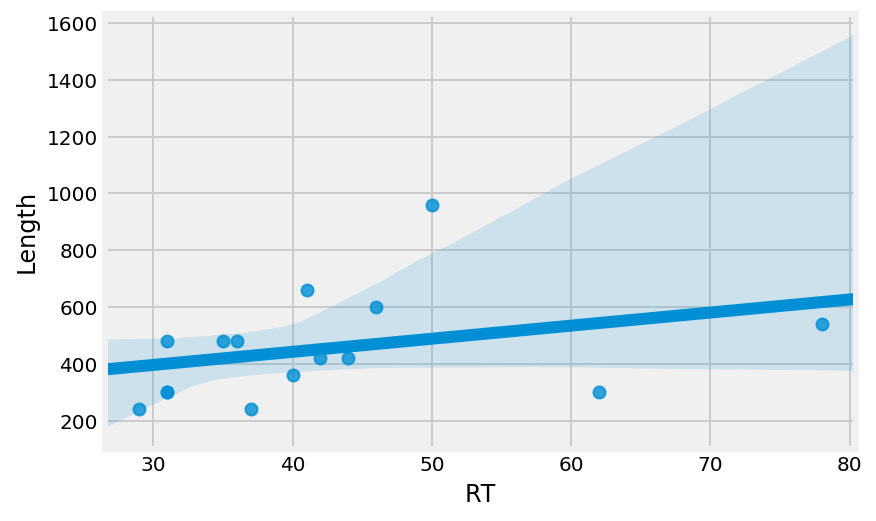

In [105]:
sns.regplot(y=stats_df.Length, x=stats_df.RT, scatter=True, fit_reg=True)

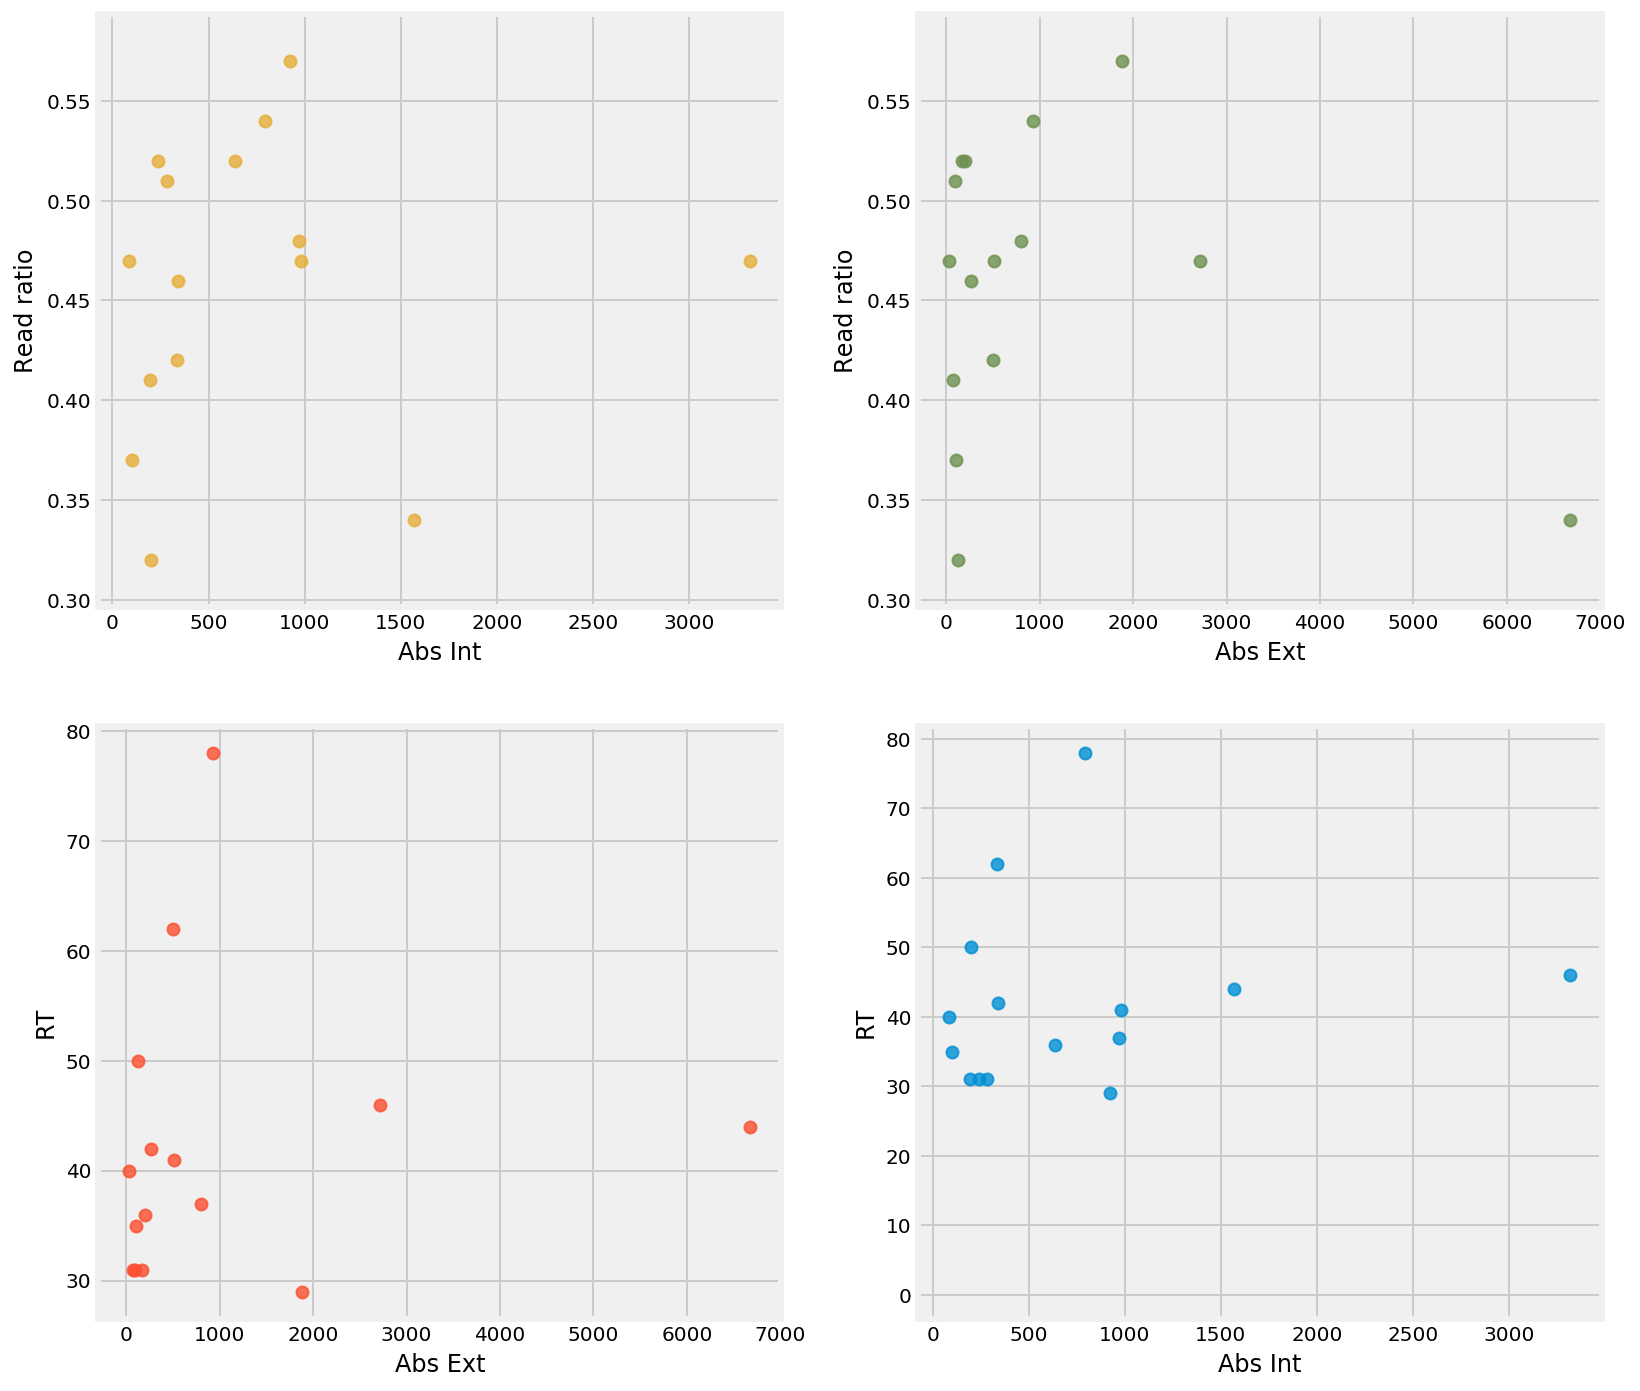

In [114]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.regplot(y=stats_df.RT, x=stats_df['Abs Int'], fit_reg=False, ax=ax[1,1])
sns.regplot(y=stats_df.RT, x=stats_df['Abs Ext'], fit_reg=False, ax=ax[1,0])
sns.regplot(y=stats_df['Read ratio'], x=stats_df['Abs Int'], fit_reg=False, ax=ax[0,0])
sns.regplot(y=stats_df['Read ratio'], x=stats_df['Abs Ext'], fit_reg=False, ax=ax[0,1])

In [115]:
sns.pairplot(stats_df)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [20]:
model_df = stats_df[['Main topic', 'Length', 'RT', 'AI', 'PG', 'PM', 'DS',
       'ML', 'TOT REC', 'Abs Int', 'Abs Ext', '1st ext', '2nd ext', 'Publication']]

In [15]:
stats_df.head()

,Vlookup,Date,Main topic,Length,RT,AI,PG,PM,DS,ML,...,Read ratio,Fans,DS.R,AI.R,ML.R,P.R,T.R,S.R,P.R.1,SE.R
0,DATA SCIENCE\nIs your test data representative...,Is your test data representative of your train...,DATA SCIENCE,300,31,No,No,No,Yes,Yes,...,0.51,8,Na,Na,Na,Na,Na,Na,Na,Na
1,DATA SCIENCE\nUsing a cluster in the cloud for...,Using a cluster in the cloud for Data Science ...,DATA SCIENCE,480,35,No,No,Yes,Yes,Yes,...,0.37,4,Na,Na,Na,Na,Na,Na,Na,Na
2,DATA SCIENCE\nHypothesis Testing in Machine Le...,Hypothesis Testing in Machine Learning: What f...,DATA SCIENCE,960,50,Yes,No,Yes,Yes,Yes,...,0.32,18,Na,Na,Na,Na,Na,Na,Na,Na
3,MACHINE LEARNING\nFacing a Classification Proj...,Facing a Classification Project in Machine Lea...,MACHINE LEARNING,480,31,Yes,No,No,Yes,Yes,...,0.41,12,Na,Na,Na,Na,Na,Na,Na,Na
4,MACHINE LEARNING\nUnboxing machine learning: f...,Unboxing machine learning: feature importance ...,MACHINE LEARNING,300,31,No,No,No,Yes,Yes,...,0.52,9,Na,Na,Na,Na,Na,Na,Na,Na


In [18]:
y = [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]

In [116]:
dum_df.shape

(15, 31)

In [23]:
dum_df = pd.get_dummies(model_df)

In [26]:
scaler = StandardScaler()
dum_df_std = scaler.fit_transform(dum_df)

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(dum_df_std, y)

print('Training score:', lin_reg.score(dum_df_std, y))

Training score: 1.0


In [71]:
coef_df = pd.DataFrame(lin_reg.coef_, columns=[['coef']])

In [72]:
coef_df['features'] = dum_df.columns

In [73]:
model_df.sort_values(by='RT')

,Main topic,Length,RT,AI,PG,PM,DS,ML,TOT REC,Abs Int,Abs Ext,1st ext,2nd ext,Publication
13,DATA SCIENCE,240,29,No,No,Yes,Yes,Yes,3,925,1879,App,Email,TDS
0,DATA SCIENCE,300,31,No,No,No,Yes,Yes,2,283,90,Email,Twitter,TDS
3,MACHINE LEARNING,480,31,Yes,No,No,Yes,Yes,3,194,72,Email,Google,BP
4,MACHINE LEARNING,300,31,No,No,No,Yes,Yes,2,239,173,Email,Google,TDS
1,DATA SCIENCE,480,35,No,No,Yes,Yes,Yes,3,100,100,Email,Google,The Startup
8,DATA SCIENCE,480,36,No,Yes,No,Yes,Yes,3,635,201,Email,Google,TDS
9,DATA SCIENCE,240,37,No,No,No,Yes,No,1,972,795,Email,LinkedIn,TDS
7,MACHINE LEARNING,360,40,No,No,No,No,Yes,1,87,31,Email,Google,DataSeries
12,MACHINE LEARNING,660,41,No,Yes,No,Yes,Yes,3,982,506,Email,Googleapis,TDS
5,DATA SCIENCE,420,42,No,No,No,Yes,Yes,2,340,268,Email,Google,DataSeries


In [76]:
coef_df

,coef,features
0,0.031466,Length
1,0.298853,RT
2,-0.039417,TOT REC
3,0.102557,Abs Int
4,0.073107,Abs Ext
5,0.012189,Main topic_DATA SCIENCE
6,-0.012189,Main topic_MACHINE LEARNING
7,0.039874,AI_No
8,-0.039874,AI_Yes
9,0.044238,PG_No
